In [1]:
import pandas as pd

import sys
import requests
import datetime as dt

#progress bars
from tqdm import tqdm 

#creating directories
from pathlib import Path

%matplotlib inline
import matplotlib.pyplot as plt


# Dataset class

### Features

* needs a download function
* needs versioning (no removal)
* check for update



# Global 

## A. Variables

In [92]:
download_dir = 'data/raw/'
cleansed_dir = 'data/clean/'

## B. Methods

In [3]:
def download_from_url(url, path):
    """
    Sends a request to a URI, opens a stream for downloading to a path
    
    Parameters
    ----------
    
    url: str
        url to download from
        
    path: str
        path, incl filename to store the data
    
    """
    
    response = requests.get(url, stream=True)

    with open(path, "wb") as out_file:
        for chunk in tqdm(response.iter_content(chunk_size=1024)):
            out_file.write(chunk)
    
    print("Done.")
    
    return
    
def create_filename(path_str, suffix, extension):
    """
    Method for unform data storage and filename handling
    """
      
    #create path for storing data
    Path(path_str).mkdir(parents=True, exist_ok=True)

    #timestamp
    t = str(dt.datetime.now())[:10]

    return path_str + t + '_' +  suffix + '.' +  extension
    

# 1. Data Spain


### A download

* Link: https://momo.isciii.es/public/momo/dashboard/momo_dashboard.html#datos

## field description (original)

[datos](https://momo.isciii.es/public/momo/dashboard/momo_dashboard.html#datos)

* Los datos están disponibles aquí en formato **CSV**, 
* y se actualizan **diariamente**. 
* Son las series temporales con los resultados de MoMo para ámbito nacional y de comunidades autónomas, en **diferentes grupos** poblacionales, durante los últimos **dos años**. 

* Consta de las siguientes columnas:

- ambito: nacional o ccaa
- cod_ambito: si es nacional, viene vacío. Si es una comunidad autónoma, trae su código ISO 3166-2.
- cod_ine_ambito: columna informativa sobre la comunidad autónoma, si aplica. Es su código INE.
- nombre_ambito: columna informativa sobre la comunidad autónoma, si aplica. Es su nombre.
- cod_sexo: código INE del sexo. 1 para hombres, 6 para mujeres.
- nombre_sexo: columna informativa sobre el sexo. Su nombre descriptivo (hombres, mujeres).
- cod_gedad: código del grupo de edad. Los posibles son: menos_65, 65_74, mas_74.
- nombre_gedad: columna informativa sobre el grupo de edad. Su nombre descriptivo (p.e. edad < 65).
- fecha_defuncion: la fecha a la que se refieren los indicadores descritos de aquí en adelante. Es la fecha en la que ocurre la defunción.
- defunciones_observadas: el número de defunciones observadas (incluye la corrección por retraso y, en años anteriores al actual, también por tendencia).
- defunciones_observadas_lim_inf: el límite inferior del invervalo de confianza de las defunciones observadas (debido a la corrección).
- defunciones_observadas_lim_sup: de forma equivalente, el límite superior.
- defunciones_esperadas: el número de defunciones esperadas, resultantes del modelo.
- defunciones_esperadas_q01: el límite inferior del intervalo de confianza de las defunciones esperadas, correspondiente al percentil 1 de la distribución.
- defunciones_esperadas_q99: de forma equivalente, el límite superior, al percentil 99.

Las series vienen agregadas por ámbito, código de ámbito, sexo, grupo de edad y fecha de defunción. Nótese que las series que son agregados del resto vienen en otra serie aparte. P.e., si se quiere elegir la serie de toda la población (nacional, todos los sexos, todas las edades), hay que filtrar por ambito="nacional", cod_sexo="all" y cod_gedad="all".

Los datos aquí descargados se refieren a las defunciones por todas las causas notificadas por los registros civiles informatizados de los municipios correspondientes. Para saber más, consulta las pestañas de “Documentación” y “Notificación”.

Nota: los datos cambian de forma retroactiva, especialmente en los días más recientes. Lo que hoy puedes descargar (o consultar en este portal) mañana puede tener indicadores diferentes en fechas pasadas. El motivo es el retraso en la notificación, detallado en la sección de Documentación.

## [deepL translator](https://www.deepl.com/translator)

The data are available here in CSV format,

and are updated daily.

These are the time series with the MoMo results for the national and autonomous community levels, in different population groups, during the last two years.

__**It consists of the following columns**__:

scope: national or ccaa

cod_ambito: if national, it comes empty. If it is an autonomous community, it comes with its ISO 3166-2 code.

cod_ine_ambito: information column on the autonomous community, if applicable. This is its INE code.

nombre_ambito: information column on the Autonomous Community, if applicable. This is its name.

**sex_code**: INE code for the sex. 1 for men, 6 for women.

sex_name: information column on sex. It is their descriptive name (men, women).

age_code: **age group code. The possible ones are: minus_65, 65_74, plus_74.**

age_name: information column about the age group. Your descriptive name (e.g. age < 65).

**date_defunction:** the date to which the indicators described below refer. It is the date on which the death occurs.

**observed_deaths**: the number of observed deaths (includes correction for delay and, in years prior to the current one, also for trend).

observed_deaths_lim_inf: the lower limit of the confidence inverse of observed deaths (due to correction).

observed_deaths_lim_sup: equivalently, the upper limit

**expected_deaths**: the number of expected deaths, resulting from the model

expected_deaths_q01: the lower limit of the confidence interval of the expected deaths, corresponding to the first percentile of the distribution.

expected_deaths_q99: equivalently, the upper limit, at the 99th percentile.

The series are aggregated by scope, scope code, sex, age group and date of death. Note that the series that are aggregated from the rest come in a separate series. E.g. if you want to choose the series for the whole population (national, all sexes, all ages), you have to filter by scope="national", cod_sex="all" and cod_age="all".

The data downloaded here refer to deaths from all causes reported by the computerized civil registries of the corresponding municipalities. To learn more, please refer to the "Documentation" and "Notification" tabs.

Note: the data changes retroactively, especially in the most recent days. What you can download today (or consult on this portal) tomorrow may have different indicators on past dates. The reason is the delay in notification, detailed in the Documentation section.

Translated with www.DeepL.com/Translator (free version)

In [4]:
download_link = 'https://momo.isciii.es/public/momo/data'
filename = create_filename(download_dir, 'spain', 'csv')
download_from_url(download_link, filename)

16653it [00:19, 839.18it/s]

Done.


### B Explore the relevant fields

In [5]:
df = pd.read_csv(filename)

In [6]:
df.head(n=5)

ambito cod_ambito  cod_ine_ambito nombre_ambito cod_sexo nombre_sexo  \
0  nacional        NaN             NaN           NaN      all       todos   
1  nacional        NaN             NaN           NaN      all       todos   
2  nacional        NaN             NaN           NaN      all       todos   
3  nacional        NaN             NaN           NaN      all       todos   
4  nacional        NaN             NaN           NaN      all       todos   

  cod_gedad nombre_gedad fecha_defuncion  defunciones_observadas  \
0       all        todos      2018-04-05                    1193   
1       all        todos      2018-04-06                    1163   
2       all        todos      2018-04-07                    1154   
3       all        todos      2018-04-08                    1068   
4       all        todos      2018-04-09                    1098   

   defunciones_observadas_lim_inf  defunciones_observadas_lim_sup  \
0                          1193.0                          1193.0   
1                          1163.0                          1163.0   
2                          1154.0                          1154.0   
3                          1068.0                          1068.0   
4                          1098.0                          1098.0   

   defunciones_esperadas  defunciones_esperadas_q01  defunciones_esperadas_q99  
0                 1101.0                    1020.49                   1223.910  
1                 1100.5                    1027.69                   1223.910  
2                 1097.5                    1027.69                   1173.775  
3                 1098.5                    1026.07                   1172.395  
4                 1096.0                    1015.01                   1166.170

In [7]:
df.shape

(179760, 15)

* What columns do we care about?

| Spanish field   | Range         | Mapped Field  | Range |
| ----------------|:-------------:|--------------:|------:|
| cod_sexo        | {'1','6', 'all'} | gender | {'M', 'F'}| 
| cod_ambito  | {'prefix', none} | region | {clone}| 
| fecha_defuncion | {'2020-04-01'} | death_date | {clone}| 
| cod_gedad | {'64_74', 'mas74', 'minos65'} | age_group | {'lt65', 'lt74', 'ht74'}| 
| defunciones_observadas | {int} | observed_deaths | {int} |
| defunciones_esperadas | {float} | expected_deaths | {int} |


* we drop the aggregations, as even the statistics can be recomputed (expected deaths can be added together)
* data from 2018-04-04 to 2020-04-21

In [8]:
df['cod_ambito'].value_counts()

AS    8988
CN    8988
ML    8988
VC    8988
MC    8988
CT    8988
CM    8988
PV    8988
GA    8988
CL    8988
EX    8988
IB    8988
RI    8988
MD    8988
CE    8988
CB    8988
AN    8988
NC    8988
AR    8988
Name: cod_ambito, dtype: int64

In [9]:
df['cod_sexo'].value_counts()

6      59920
all    59920
1      59920
Name: cod_sexo, dtype: int64

In [10]:
df['fecha_defuncion'].value_counts().sort_index()

2018-04-05    240
2018-04-06    240
2018-04-07    240
2018-04-08    240
2018-04-09    240
             ... 
2020-04-18    240
2020-04-19    240
2020-04-20    240
2020-04-21    240
2020-04-22    240
Name: fecha_defuncion, Length: 749, dtype: int64

* death date

- 240 values per date? gender(3) * age(4) => location? That would mean 20 different locations

In [11]:
df['cod_gedad'].value_counts()

65_74       44940
mas_74      44940
all         44940
menos_65    44940
Name: cod_gedad, dtype: int64

* a plot of the death rate

In [12]:
mask1 = df['ambito'] == 'nacional'
mask2 = df['cod_sexo'] == 'all'
mask3a = df['cod_gedad'] == 'menos_65'
mask3b= df['cod_gedad'] == '65_74'
mask3c = df['cod_gedad'] == 'mas_74'

mask = mask1 & mask2


df65   = df[mask & mask3a]
df6574 = df[mask & mask3b]
df74   = df[mask & mask3c]




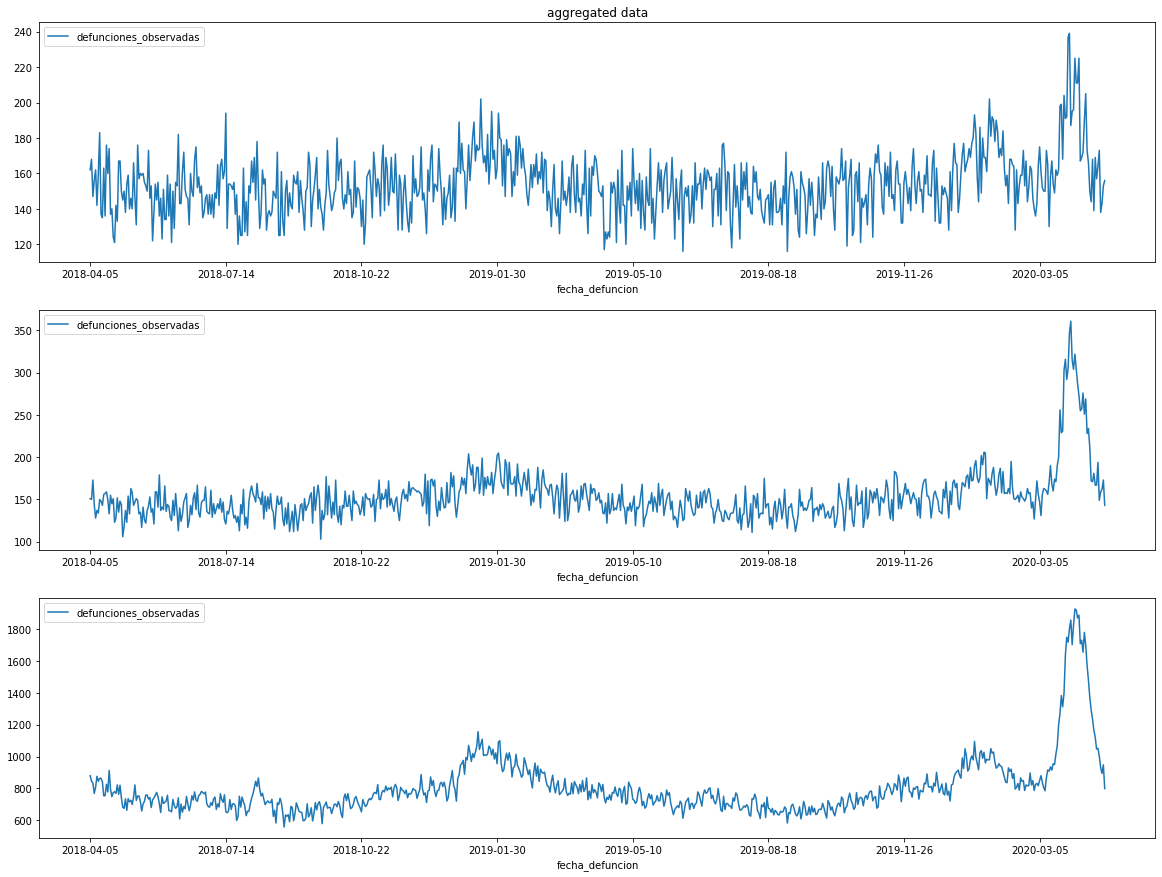

In [17]:
fig, ax = plt.subplots(3,1, figsize=(20,15), )


df65.sort_values(['fecha_defuncion']).set_index(['fecha_defuncion']).plot(kind='line', y='defunciones_observadas', ax=ax[0], title='aggregated data')
df6574.sort_values(['fecha_defuncion']).set_index(['fecha_defuncion']).plot(kind='line', y='defunciones_observadas', ax=ax[1], title=None)
df74.sort_values(['fecha_defuncion']).set_index(['fecha_defuncion']).plot(kind='line', y='defunciones_observadas', ax=ax[2], title=None)


### C. Clean the dataframe

1. Keep only interesting columns
2. Remove aggregate values (per gender, per country, per age group_

In [28]:
interesting_cols = ['cod_sexo', 'cod_ambito', 'fecha_defuncion', 'cod_gedad', \
                     'defunciones_observadas', 'defunciones_esperadas']

df_1 = df.filter(interesting_cols)
df_1.head(n=5)

cod_sexo cod_ambito fecha_defuncion cod_gedad  defunciones_observadas  \
0      all        NaN      2018-04-05       all                    1193   
1      all        NaN      2018-04-06       all                    1163   
2      all        NaN      2018-04-07       all                    1154   
3      all        NaN      2018-04-08       all                    1068   
4      all        NaN      2018-04-09       all                    1098   

   defunciones_esperadas  
0                 1101.0  
1                 1100.5  
2                 1097.5  
3                 1098.5  
4                 1096.0

In [38]:
mask_gender = df_1['cod_sexo'] != 'all'
df_1_f1 = df_1[mask_gender]
#df_1_f1['cod_sexo'].value_counts()

mask_age = df_1_f1['cod_gedad'] != 'all'
df_1_f2 = df_1_f1[mask_age]
df_1_f2

#mask_country = 
df_2 = pd.DataFrame(df_1_f2.dropna(subset=['cod_ambito']))
df_2

cod_sexo cod_ambito fecha_defuncion cod_gedad  defunciones_observadas  \
11984         1         AN      2018-04-05  menos_65                      24   
11985         1         AN      2018-04-06  menos_65                      21   
11986         1         AN      2018-04-07  menos_65                      22   
11987         1         AN      2018-04-08  menos_65                      23   
11988         1         AN      2018-04-09  menos_65                      13   
...         ...        ...             ...       ...                     ...   
179755        6         ML      2020-04-18    mas_74                       0   
179756        6         ML      2020-04-19    mas_74                       0   
179757        6         ML      2020-04-20    mas_74                       0   
179758        6         ML      2020-04-21    mas_74                       1   
179759        6         ML      2020-04-22    mas_74                       1   

        defunciones_esperadas  
11984                    20.0  
11985                    20.0  
11986                    20.0  
11987                    20.0  
11988                    20.0  
...                       ...  
179755                    0.0  
179756                    0.0  
179757                    0.0  
179758                    0.0  
179759                    0.0  

[85386 rows x 6 columns]

3. create col gender (map values, rename column, drop old column)
4. create col region (rename)
5. create col death_date (rename and cast to datetime)
6. create col age_group (rename, map values)
7. create col observed_deaths (rename, cast to int)
8. create col expected_deaths (rename, cast to float)

In [49]:
df_2['gender'] = df_2['cod_sexo'].apply(lambda x: 'M' if x == '1' else 'F')
df_3 = df_2.drop('cod_sexo', axis=1)

In [50]:
df_3['region'] = df_3['cod_ambito']
df_3['country'] = 'ESP'
df_4 = df_3.drop('cod_ambito', axis=1)

In [54]:
df_4['death_date'] = pd.to_datetime(df_4['fecha_defuncion'])
df_5 = df_4.drop('fecha_defuncion', axis=1)

In [57]:
df_5['death_date'].min()

Timestamp('2018-04-05 00:00:00')

In [58]:
df_5['death_date'].max()

Timestamp('2020-04-22 00:00:00')

In [60]:
df_5['cod_gedad'].value_counts()

65_74       28462
menos_65    28462
mas_74      28462
Name: cod_gedad, dtype: int64

In [82]:
def map_age(spanish):
    if spanish == "65_75":
        return spanish
    elif spanish == "menos_65":
        return "0_65"
    else:
        return "75_"

df_5['age_group'] = df_5['cod_gedad'].apply(map_age)

df_6 = df_5.drop('cod_gedad', axis=1)
    

In [86]:
df_6['observed_deaths'] = pd.to_numeric(df_6['defunciones_observadas'] ,downcast='integer')
df_7 = df_6.drop('defunciones_observadas', axis=1)


In [89]:
df_7['expected_deaths'] = pd.to_numeric(df_6['defunciones_esperadas'] ,downcast='float')
df_8 = df_7.drop('defunciones_esperadas', axis=1)

In [91]:
df_8.dtypes

gender                     object
region                     object
country                    object
death_date         datetime64[ns]
age_group                  object
observed_deaths             int16
expected_deaths           float32
dtype: object

In [95]:
f = create_filename(cleansed_dir, 'spain', 'csv')
df_8.to_csv(f, sep=',', header=True, index=False)

